This notebook performs simulated annealing to find the smallest possible distance to visit all the cities. 

# Mount Drive and Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/DSA4212/DSA4212_Assignment3

In [ ]:
import numpy as np
from tqdm import tqdm
import math
import random
import matplotlib.pyplot as plt

# Load Data

The data is loaded and plotted to give us an idea of the cities and for sanity check.

In [ ]:
data = np.load('cities.npy', allow_pickle = True)

In [ ]:
x = np.transpose(data)[0]
y = np.transpose(data)[1]

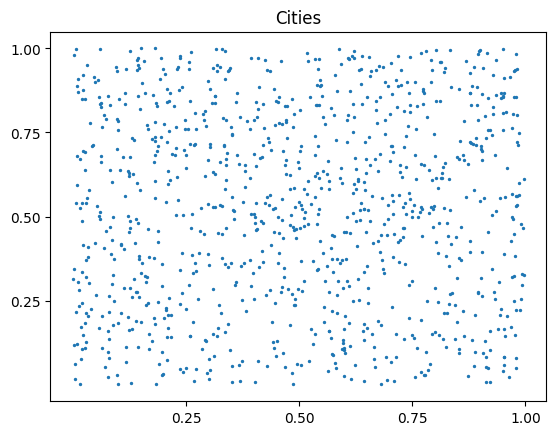

In [ ]:
plt.scatter(x,y,s=2)
plt.xticks([0.25,0.5,0.75,1])
plt.yticks([0.25,0.5,0.75,1])
plt.title('Cities')
plt.show()

# Simulated Annealing

The first portion of simulated annealing is implememnted using a random order initialization, then performing swaps to advance to neighboring states. 

Path of a random order initialization is shown below

In [ ]:
rand_order = list(range(len(data)))
random.shuffle(rand_order)

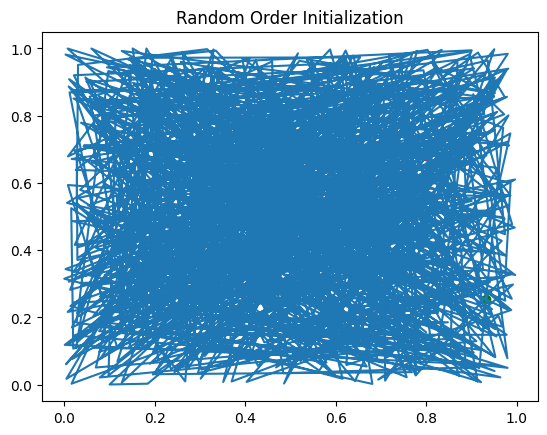

In [ ]:
new_x = x[rand_order]
new_y = y[rand_order]

plt.plot(new_x, new_y)
plt.scatter(new_x[0], new_y[0], color = "green")
plt.scatter(new_x[-1], new_y[-1], color = "red")
plt.title('Random Order Initialization')
plt.show()

The following functions are defined to calculate the distance

In [ ]:
def distance(city1, city2):
    """
    Calculate the Euclidean distance between two cities.
    """
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(cities, order):
    """
    Calculate the total distance of a given route order.
    """
    dist = 0
    for i in range(len(order)):
        dist += distance(cities[order[i]], cities[order[(i + 1) % len(order)]])
    return dist

The following function is used to perform simulated annealing

In [ ]:
def simulated_annealing(cities, T, alpha, iter):
    """
    Use simulated annealing to solve the TSP.
    Returns the best order, and trajectories of current score, best core, and value of T
    """
    # Initialize the route with a random order
    init_order = list(range(len(cities)))
    random.shuffle(init_order)

    # Set the initial best route as the current route
    best_order = init_order[:]

    #Track values 
    new_scores = []
    best_scores = []
    temp = []

    # Iteratively perform annealing 
    for i in tqdm(range(iter)): 
      #current T
      temp.append(T)
      # Randomly select two cities to swap
      r1, r2 = r1, r2 = random.sample(range(len(cities)), 2)
      # Swap in current route
      new_order = best_order[:]
      new_order[r1], new_order[r2] = new_order[r2], new_order[r1]
      # Calculate the cost of the new route
      new_cost = total_distance(cities, new_order)
      new_scores.append(new_cost)
      # Calculate current best cost so far 
      cur_cost = total_distance(cities, best_order)
      best_scores.append(cur_cost)
      # Probability (decide whether to accept new route)
      swap = False 
      if (new_cost - cur_cost) <= 0: 
        swap = True
      else: 
        prob = math.exp(-(new_cost-cur_cost)/T)
        thresh = random.uniform(0,1)
        if prob > thresh: 
          swap = True
      #Update best route 
      if swap: 
        best_order = new_order[:]
      
      #T decay 
      T *= alpha
    
    return best_order, new_scores, best_scores, temp


The following code chunks outline a few trials of T values, alpha, and number of iterations. The trajectories are also plotted to see if they help us to point to better parameters to try out. 

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 1000, alpha = 0.99, iter = 10000)

100%|██████████| 10000/10000 [00:36<00:00, 277.13it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [916, 575, 76, 338, 809, 376, 532, 745, 569, 890, 497, 804, 816, 139, 746, 853, 915, 475, 502, 183, 948, 232, 695, 7, 110, 77, 488, 602, 83, 596, 609, 370, 760, 95, 98, 690, 845, 361, 764, 335, 558, 241, 782, 777, 691, 607, 390, 919, 960, 995, 182, 106, 749, 426, 354, 554, 651, 229, 730, 800, 461, 767, 20, 383, 620, 14, 283, 349, 742, 594, 368, 627, 188, 588, 934, 171, 629, 571, 812, 688, 827, 73, 734, 774, 204, 205, 19, 618, 940, 896, 692, 234, 818, 47, 258, 932, 226, 81, 822, 99, 610, 926, 40, 689, 356, 423, 659, 606, 871, 141, 123, 145, 355, 203, 622, 868, 703, 89, 923, 202, 127, 582, 105, 246, 280, 765, 574, 284, 310, 955, 297, 733, 67, 992, 686, 12, 103, 454, 138, 829, 576, 247, 821, 810, 125, 35, 523, 933, 417, 637, 755, 97, 947, 62, 566, 670, 815, 788, 712, 28, 515, 176, 507, 108, 451, 976, 166, 312, 151, 792, 87, 214, 18, 941, 392, 836, 385, 64, 833, 384, 3, 650, 861, 773, 408, 674, 2, 313, 264, 819, 120, 306, 102, 870, 419, 842, 74, 540, 713, 675, 132, 817, 172, 45

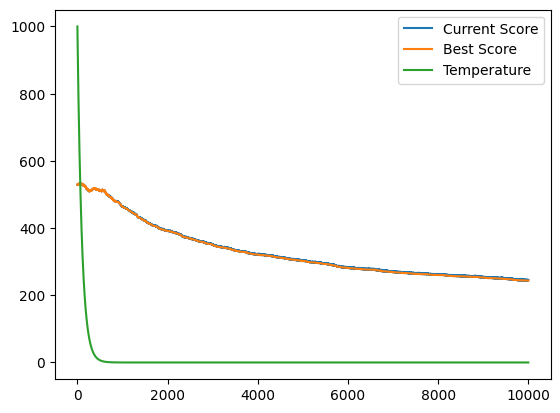

In [ ]:
plt.plot(np.arange(10000), curr_score, label = 'Current Score')
plt.plot(np.arange(10000), best_sore, label = 'Best Score')
plt.plot(np.arange(10000), temperature, label = 'Temperature')
plt.legend()
plt.show()

Let us try to increase the iterations

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 1000, alpha = 0.99, iter = 100000)

100%|██████████| 100000/100000 [06:13<00:00, 267.55it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [427, 827, 325, 731, 567, 433, 713, 297, 657, 941, 452, 858, 925, 405, 458, 526, 906, 970, 557, 791, 818, 592, 843, 225, 644, 708, 3, 620, 982, 744, 303, 548, 277, 453, 558, 602, 862, 425, 908, 754, 172, 504, 246, 139, 173, 341, 695, 196, 785, 138, 444, 532, 393, 41, 508, 595, 434, 449, 141, 550, 28, 485, 702, 783, 521, 55, 733, 773, 692, 660, 917, 215, 725, 264, 514, 498, 27, 304, 822, 35, 496, 808, 735, 622, 935, 234, 245, 473, 971, 481, 837, 591, 143, 290, 39, 618, 515, 477, 650, 148, 211, 366, 539, 342, 63, 185, 798, 489, 852, 182, 278, 340, 227, 124, 360, 168, 170, 974, 999, 938, 156, 870, 638, 765, 207, 338, 183, 966, 553, 387, 88, 353, 179, 989, 159, 370, 980, 379, 626, 723, 358, 292, 34, 94, 538, 830, 812, 118, 576, 788, 913, 994, 565, 403, 555, 269, 251, 71, 820, 475, 463, 305, 204, 741, 607, 15, 464, 135, 488, 748, 915, 499, 107, 922, 709, 760, 244, 637, 614, 242, 476, 401, 861, 554, 705, 455, 880, 315, 821, 893, 349, 877, 836, 302, 120, 177, 560, 95, 807, 552, 96

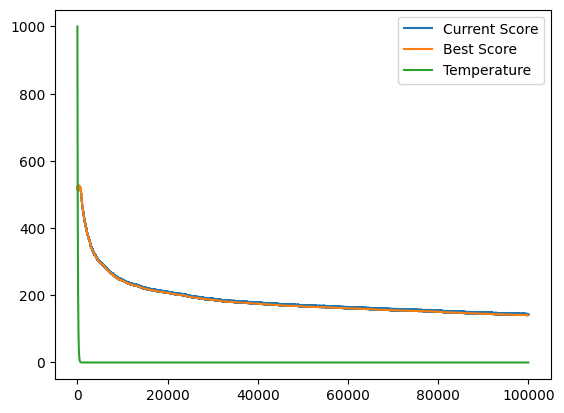

In [ ]:
plt.plot(np.arange(100000), curr_score, label = 'Current Score')
plt.plot(np.arange(100000), best_sore, label = 'Best Score')
plt.plot(np.arange(100000), temperature, label = 'Temperature')
plt.legend()
plt.show()

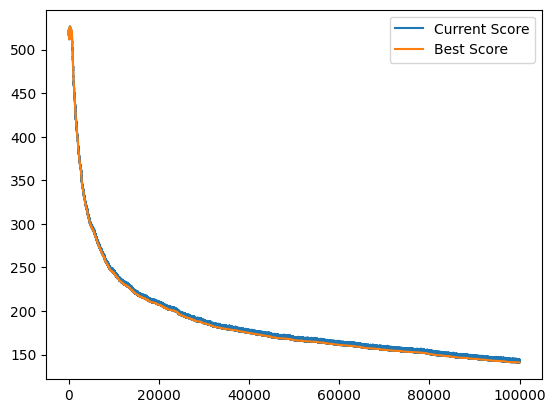

In [ ]:
plt.plot(np.arange(100000), curr_score, label = 'Current Score')
plt.plot(np.arange(100000), best_sore, label = 'Best Score')
plt.legend()
plt.show()

Let's also try to make the T decay slower and increase iterations by a bit more

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 1000, alpha = 0.7, iter = 500000)

100%|██████████| 500000/500000 [30:25<00:00, 273.91it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [326, 517, 575, 191, 184, 108, 676, 812, 344, 205, 513, 281, 470, 843, 707, 758, 867, 256, 255, 391, 514, 525, 671, 330, 79, 783, 598, 149, 472, 887, 715, 94, 459, 544, 93, 484, 77, 920, 110, 820, 663, 915, 745, 456, 237, 305, 30, 865, 885, 414, 293, 721, 427, 888, 369, 464, 520, 415, 38, 612, 198, 475, 778, 835, 924, 248, 993, 257, 11, 462, 958, 548, 76, 726, 792, 530, 518, 69, 209, 349, 893, 274, 147, 751, 246, 641, 128, 883, 534, 925, 269, 374, 162, 724, 996, 197, 226, 977, 99, 364, 898, 677, 594, 742, 685, 362, 579, 622, 206, 816, 100, 900, 807, 560, 819, 856, 405, 910, 85, 609, 793, 599, 239, 604, 669, 115, 380, 559, 760, 165, 600, 180, 827, 754, 787, 321, 872, 352, 489, 798, 166, 785, 693, 980, 379, 500, 653, 573, 106, 846, 969, 683, 56, 107, 585, 218, 325, 348, 615, 967, 137, 930, 834, 327, 478, 358, 516, 7, 714, 420, 51, 632, 739, 196, 934, 602, 103, 806, 21, 337, 842, 62, 28, 592, 44, 477, 449, 628, 686, 354, 550, 528, 343, 678, 905, 997, 52, 483, 731, 743, 301, 18

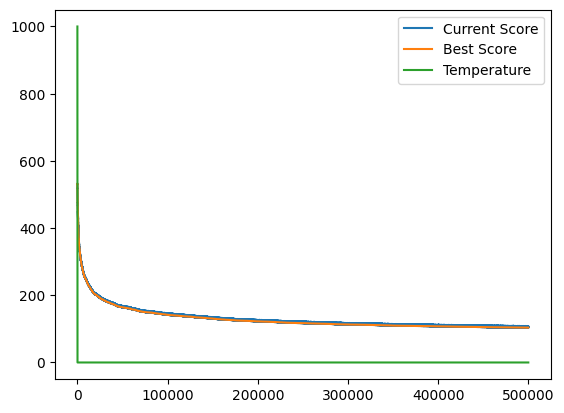

In [ ]:
plt.plot(np.arange(500000), curr_score, label = 'Current Score')
plt.plot(np.arange(500000), best_sore, label = 'Best Score')
plt.plot(np.arange(500000), temperature, label = 'Temperature')
plt.legend()
plt.show()

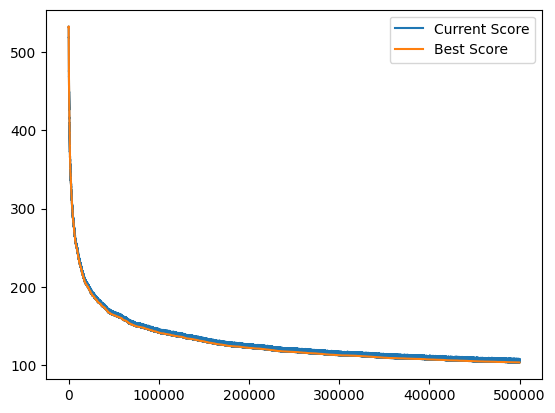

In [ ]:
plt.plot(np.arange(500000), curr_score, label = 'Current Score')
plt.plot(np.arange(500000), best_sore, label = 'Best Score')
plt.legend()
plt.show()

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 1000, alpha = 0.9, iter = 1000000)

100%|██████████| 1000000/1000000 [1:00:23<00:00, 275.98it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [311, 875, 469, 374, 271, 558, 162, 284, 852, 315, 178, 101, 72, 91, 77, 484, 949, 862, 107, 499, 683, 237, 456, 926, 915, 110, 663, 425, 171, 342, 463, 305, 864, 985, 174, 707, 608, 829, 64, 658, 111, 575, 872, 209, 893, 956, 6, 588, 248, 130, 368, 511, 505, 964, 97, 590, 984, 615, 506, 282, 847, 541, 131, 359, 609, 310, 988, 563, 322, 339, 255, 561, 905, 711, 373, 200, 252, 147, 183, 976, 810, 934, 602, 454, 605, 251, 718, 545, 733, 54, 297, 399, 426, 428, 797, 859, 977, 667, 672, 40, 679, 892, 983, 907, 693, 834, 168, 492, 761, 10, 749, 844, 998, 182, 836, 108, 321, 350, 625, 155, 63, 78, 122, 487, 395, 198, 668, 920, 103, 524, 71, 652, 69, 888, 17, 801, 767, 309, 910, 461, 187, 244, 173, 989, 143, 927, 654, 583, 257, 921, 205, 344, 902, 796, 777, 438, 163, 336, 840, 440, 227, 805, 940, 938, 896, 861, 858, 145, 102, 740, 3, 536, 550, 28, 96, 343, 648, 904, 367, 288, 794, 901, 86, 574, 863, 788, 87, 744, 982, 296, 576, 546, 953, 307, 753, 361, 365, 618, 405, 246, 206, 703

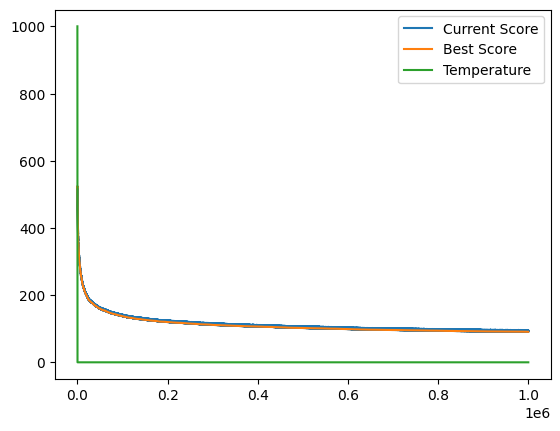

In [ ]:
plt.plot(np.arange(1000000), curr_score, label = 'Current Score')
plt.plot(np.arange(1000000), best_sore, label = 'Best Score')
plt.plot(np.arange(1000000), temperature, label = 'Temperature')
plt.legend()
plt.show()

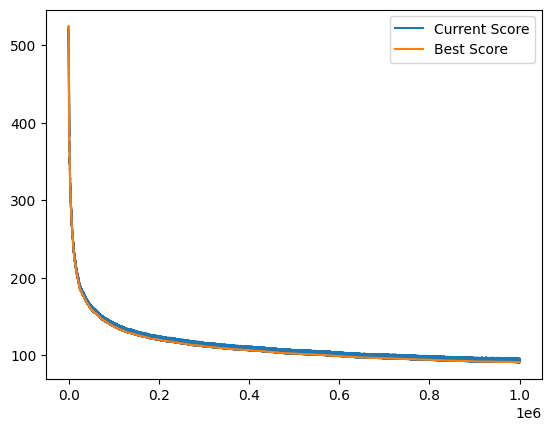

In [ ]:
plt.plot(np.arange(1000000), curr_score, label = 'Current Score')
plt.plot(np.arange(1000000), best_sore, label = 'Best Score')
plt.legend()
plt.show()

As shown by the trials, after 1 hour of iterations, the algorithm is able to only converge to a distance of 90 which is clearly quite high considering the distribution of the cities in the given dataset. Hence, the algorithm will have to be run a lot longer to converege to a good solution, which is not the most feasible. 

# Nearest Neighbors With Simulating Annealing

To reduce the time for simulated annealing, as well as improve upon the solution of NN, both methods are combined. First an optimized route is generated using nearest neighbors, then Simulated Annealing is used with using the optimized NN route as the initalization. 

In [ ]:
def euclidean_dist(a,b):
  return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [ ]:
n = 1000
distances = np.zeros((n,n))
for i in range(n):
  for j in range(i, n):
    dist = euclidean_dist(data[i], data[j])
    distances[i][j] = dist
    distances[j][i] = dist

In [ ]:
# Functions finding nearest neighbor 
visited = set()
route = []

def nearest_neighbour(city):
  dist = np.inf
  nearest = 1000
  for i in range(n):
    if distances[i][city] < dist and i not in visited:
      dist = distances[i][city]
      nearest = i
  return nearest

def tour(starting):
  current = starting
  visited.add(starting)
  
  route.append(current)
  total_dist = 0
  while len(visited) < n:
    next = nearest_neighbour(current)
    visited.add(next)
    route.append(next)
    total_dist += distances[current][next]
    current = next
  
  #final route does not include starting point, but total_distance does
  total_dist += distances[current][starting]

  return total_dist

The tour is done from 858 starting point, which is found to be the best starting point from 'Nearest Neighbors' notebook.

In [ ]:
visited = set()
route = []
tour(858)

27.936835400493667

The simulated annealing function is defined again to update initialization

In [ ]:
def simulated_annealing(cities, T, alpha, iter):
    """
    Use simulated annealing to solve the TSP.
    """
    # Set the initial best route as the nearest neihgbor route
    best_order = route[:]

    #Track values 
    new_scores = []
    best_scores = []
    temp = []

    # Iteratively perform annealing 
    for i in tqdm(range(iter)): 
      #current T
      temp.append(T)
      # Randomly select two cities to swap
      r1, r2 = r1, r2 = random.sample(range(len(cities)), 2)
      # Swap in current route
      new_order = best_order[:]
      new_order[r1], new_order[r2] = new_order[r2], new_order[r1]
      # Calculate the cost of the new route
      new_cost = total_distance(cities, new_order)
      new_scores.append(new_cost)
      # Calculate current best cost so far 
      cur_cost = total_distance(cities, best_order)
      best_scores.append(cur_cost)
      # Probability (decide whether to accept new route)
      swap = False 
      if (new_cost - cur_cost) <= 0: 
        swap = True
      else: 
        prob = math.exp(-(new_cost-cur_cost)/T)
        thresh = random.uniform(0,1)
        if prob > thresh: 
          swap = True
      #Update best route 
      if swap: 
        best_order = new_order[:]
      
      #T decay 
      T *= alpha
      
      
    
    return best_order, new_scores, best_scores, temp


In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 1000, alpha = 0.99, iter = 10000)

100%|██████████| 10000/10000 [00:48<00:00, 205.31it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [162, 277, 954, 44, 477, 554, 642, 913, 377, 485, 773, 925, 140, 640, 970, 441, 766, 253, 999, 142, 982, 338, 574, 558, 544, 209, 546, 123, 583, 165, 552, 539, 83, 746, 263, 408, 736, 661, 278, 811, 906, 299, 961, 536, 620, 938, 104, 933, 610, 312, 51, 958, 726, 5, 857, 998, 92, 228, 102, 470, 663, 121, 483, 752, 327, 445, 413, 984, 930, 390, 60, 285, 664, 283, 95, 376, 435, 387, 466, 793, 436, 79, 131, 410, 492, 437, 818, 418, 910, 113, 573, 94, 997, 117, 46, 478, 53, 869, 396, 308, 352, 810, 1, 698, 495, 827, 812, 459, 366, 89, 2, 831, 976, 183, 317, 229, 251, 176, 548, 384, 281, 395, 915, 21, 753, 197, 296, 606, 720, 182, 187, 823, 25, 874, 215, 879, 917, 520, 577, 603, 846, 700, 916, 456, 174, 424, 122, 585, 344, 939, 776, 754, 243, 15, 774, 983, 501, 990, 682, 434, 929, 153, 923, 404, 318, 295, 537, 124, 13, 239, 280, 966, 412, 635, 596, 9, 301, 794, 737, 249, 656, 651, 755, 665, 701, 675, 758, 193, 921, 914, 69, 100, 49, 292, 796, 472, 623, 905, 522, 61, 688, 936, 833

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 2, alpha = 0.9, iter = 500000)

100%|██████████| 500000/500000 [36:44<00:00, 226.81it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [858, 145, 449, 44, 64, 320, 477, 428, 266, 992, 452, 382, 287, 383, 554, 294, 80, 842, 763, 129, 716, 299, 925, 889, 768, 334, 718, 20, 801, 660, 876, 651, 767, 309, 531, 154, 775, 557, 894, 970, 906, 405, 211, 228, 497, 140, 42, 684, 458, 24, 509, 223, 804, 839, 89, 570, 769, 229, 316, 306, 553, 81, 520, 200, 645, 146, 727, 390, 35, 825, 952, 38, 375, 877, 867, 376, 435, 653, 793, 466, 317, 387, 752, 117, 434, 795, 94, 538, 478, 121, 318, 295, 500, 635, 874, 109, 275, 59, 830, 243, 516, 324, 599, 358, 723, 741, 626, 494, 292, 34, 48, 607, 136, 611, 442, 46, 887, 715, 472, 567, 623, 433, 699, 595, 881, 314, 490, 52, 483, 438, 743, 41, 604, 239, 301, 803, 669, 115, 776, 704, 556, 457, 676, 717, 393, 424, 471, 812, 696, 634, 980, 413, 240, 873, 774, 445, 15, 259, 612, 199, 698, 285, 701, 182, 260, 298, 596, 665, 816, 464, 66, 966, 302, 252, 725, 187, 215, 637, 120, 755, 968, 819, 973, 897, 587, 329, 560, 135, 177, 369, 539, 100, 49, 98, 714, 721, 108, 823, 7, 919, 157, 827, 

In [ ]:
sim_order, curr_score, best_sore, temperature = simulated_annealing(data, T = 0.3, alpha = 0.99, iter = 100)

100%|██████████| 100/100 [00:00<00:00, 277.84it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [858, 145, 449, 44, 477, 320, 428, 426, 266, 992, 452, 382, 287, 383, 554, 294, 80, 842, 763, 129, 716, 299, 768, 889, 925, 334, 718, 20, 801, 660, 876, 651, 767, 309, 531, 154, 775, 557, 894, 970, 906, 405, 211, 228, 497, 140, 42, 684, 458, 24, 509, 223, 804, 839, 89, 570, 769, 229, 316, 306, 553, 81, 520, 200, 645, 727, 146, 390, 35, 825, 952, 38, 375, 877, 867, 376, 435, 653, 466, 793, 317, 387, 752, 117, 434, 795, 94, 538, 478, 121, 318, 295, 500, 635, 874, 109, 275, 830, 59, 243, 516, 325, 599, 358, 723, 741, 626, 494, 34, 292, 48, 607, 136, 611, 442, 46, 887, 715, 472, 567, 623, 433, 699, 595, 881, 314, 490, 52, 483, 438, 743, 41, 604, 239, 301, 803, 669, 115, 776, 704, 556, 457, 503, 717, 424, 696, 812, 471, 379, 980, 118, 413, 240, 873, 774, 445, 15, 259, 612, 199, 698, 285, 701, 182, 260, 596, 298, 665, 816, 464, 66, 966, 302, 252, 725, 187, 215, 637, 120, 755, 968, 819, 973, 897, 587, 329, 560, 135, 177, 369, 539, 100, 49, 98, 714, 721, 108, 823, 7, 919, 157, 468,

In first few iterations, the function seems to return a worst distance most likely since the algorithm attempts to "move out" of the local minima and explore other values before converging to another local minima. This, again, may not be the most ideal considering run time. 

# Nearest Neighbors with Simulated Annealing (no T, only swaps)

Let us finally try to see if performing only swaps without any T results in a  better result i.e. neighboring states are only accepted if they return a better solution.

In [ ]:
def simulated_annealing(cities, iter):
    """
    Use simulated annealing to solve the TSP.
    """
    # Set the initial best route as the KNN route
    best_order = route[:]

    #Track values 
    new_scores = []
    best_scores = []

    # Iteratively perform annealing 
    for i in tqdm(range(iter)): 
      # Randomly select two cities to swap
      r1, r2 = r1, r2 = random.sample(range(len(cities)), 2)
      # Swap in current route
      new_order = best_order[:]
      new_order[r1], new_order[r2] = new_order[r2], new_order[r1]
      # Calculate the cost of the new route
      new_cost = total_distance(cities, new_order)
      new_scores.append(new_cost)
      # Calculate current best cost so far 
      cur_cost = total_distance(cities, best_order)
      best_scores.append(cur_cost)
      # Probability (decide whether to accept new route)
      if (new_cost - cur_cost) <= 0: 
        best_order = new_order[:]
      
      
    return best_order, new_scores, best_scores


In [ ]:
sim_order, curr_score, best_sore = simulated_annealing(data, iter = 1000000)

100%|██████████| 1000000/1000000 [1:13:11<00:00, 227.69it/s]


In [ ]:
print("Best order:", sim_order)
print("Total distance:", total_distance(data, sim_order))

Best order: [858, 145, 449, 44, 477, 320, 428, 426, 266, 992, 452, 382, 287, 383, 554, 294, 80, 842, 763, 129, 716, 299, 925, 889, 768, 334, 718, 20, 801, 660, 876, 651, 767, 309, 531, 154, 775, 557, 894, 970, 405, 906, 211, 228, 497, 140, 42, 684, 458, 24, 509, 223, 804, 839, 89, 570, 769, 229, 316, 306, 553, 81, 520, 200, 645, 146, 727, 390, 35, 825, 952, 38, 375, 877, 867, 376, 435, 653, 793, 466, 317, 387, 752, 117, 434, 795, 94, 538, 478, 121, 318, 295, 500, 635, 874, 109, 275, 830, 59, 324, 516, 325, 599, 358, 723, 741, 626, 494, 292, 34, 48, 607, 136, 611, 442, 46, 887, 715, 472, 567, 623, 433, 699, 595, 881, 314, 490, 52, 483, 438, 743, 41, 604, 239, 301, 803, 669, 115, 776, 704, 556, 457, 503, 717, 424, 696, 471, 812, 379, 980, 118, 413, 240, 873, 774, 445, 15, 259, 612, 199, 698, 285, 701, 182, 260, 298, 596, 665, 816, 464, 66, 966, 302, 252, 725, 187, 215, 637, 120, 755, 968, 819, 973, 897, 587, 329, 560, 135, 177, 369, 539, 100, 49, 98, 714, 108, 721, 823, 7, 919, 157, 827,